In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv("Data-Files/Load_Default.csv")
data

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Employment_Length,Previous_Defaults,Loan_Default
0,56,180,617,67,14,10,1,1
1,46,198,535,32,18,33,1,1
2,32,190,633,64,12,7,0,0
3,60,120,675,83,27,21,0,0
4,25,31,758,98,11,7,0,1
...,...,...,...,...,...,...,...,...
495,37,171,766,19,26,37,0,0
496,41,57,713,47,28,14,0,0
497,29,182,754,52,8,20,0,0
498,52,113,532,91,21,34,1,1


In [3]:
X = data.drop(columns=["Loan_Default"]).values
y = data["Loan_Default"].values
print(f"{X}\n{y}")

[[ 56 180 617 ...  14  10   1]
 [ 46 198 535 ...  18  33   1]
 [ 32 190 633 ...  12   7   0]
 ...
 [ 29 182 754 ...   8  20   0]
 [ 52 113 532 ...  21  34   1]
 [ 50 114 523 ...  28  13   1]]
[1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Binary classification
])
model

C:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [7]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model

<Sequential name=sequential, built=True>

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2544 - loss: 0.8455 - val_accuracy: 0.4250 - val_loss: 0.7455
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4950 - loss: 0.7358 - val_accuracy: 0.6375 - val_loss: 0.6737
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6232 - loss: 0.6599 - val_accuracy: 0.7125 - val_loss: 0.6196
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7588 - loss: 0.6121 - val_accuracy: 0.7750 - val_loss: 0.5740
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8185 - loss: 0.5491 - val_accuracy: 0.7875 - val_loss: 0.5347
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8098 - loss: 0.5168 - val_accuracy: 0.7875 - val_loss: 0.5021
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8397 - loss: 0.4659 - val_accuracy: 0.8000 - val_loss: 0.4740
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8432 - loss: 0.4361 - val_accuracy: 0.8000 - v

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9632 - loss: 0.1183 
Test Loss: 0.1156, Test Accuracy: 0.9600


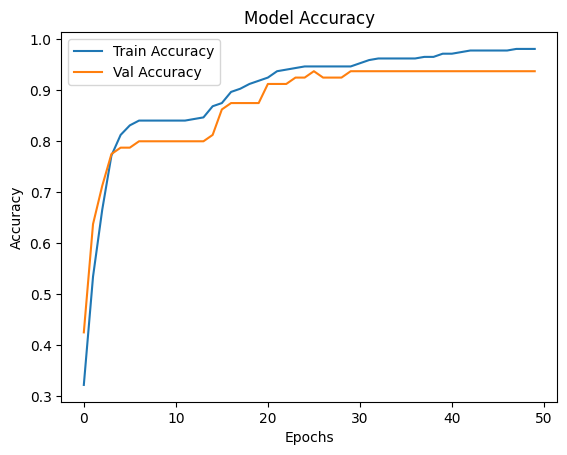

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

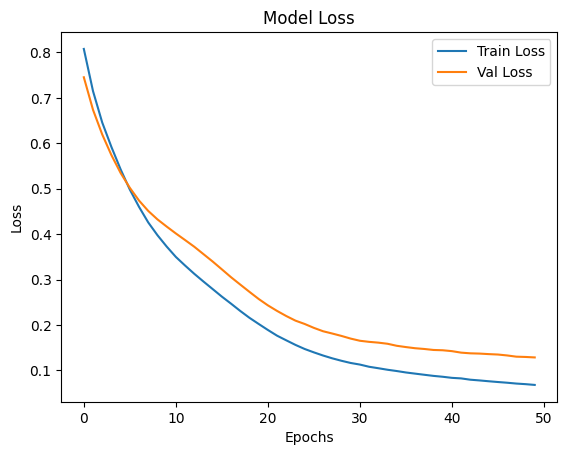

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()